In [1]:
import glob
from PIL import Image
from utils import image_analysis

path = "./ROC"
species = ["Staphylococcus aureus", "Coagulase-negative Staphylococcus"]
#species = ["Coagulase-negative Staphylococcus"]

probs = dict.fromkeys(species)
for key in probs.keys():
    probs[key] = []

# Evaluate overall probability of each snapshot
for sp in species:
    files = glob.glob(path + "/" + sp + "/*.JPG")
    for filename in files:
        img = Image.open(filename)
        # Image classification
        crop_width, crop_height = 512, 512
        class_indices, result = image_analysis.image_classifier(img, crop_width, crop_height, verbose=False)

        # Calculate overall probability
#        overall_prob = image_analysis.calc_overall_probability(class_indices, result, max_method=True, max_key="Staphylococcus aureus")
        overall_prob = image_analysis.calc_overall_probability(class_indices, result)
        probs[sp].append(overall_prob)
        print("Evaluated {}".format(filename))


########################### Summary #############################
Staphylococcus aureus                              16.6108%
Coagulase-negative Staphylococcus                  81.6993%
Background                                          1.6899%
Evaluated ./ROC/Staphylococcus aureus/IMG_2818.JPG
########################### Summary #############################
Staphylococcus aureus                              11.8674%
Coagulase-negative Staphylococcus                  85.1299%
Background                                          3.0027%
Evaluated ./ROC/Staphylococcus aureus/IMG_2824.JPG
########################### Summary #############################
Staphylococcus aureus                              14.1866%
Coagulase-negative Staphylococcus                  82.8062%
Background                                          3.0073%
Evaluated ./ROC/Staphylococcus aureus/IMG_2819.JPG
########################### Summary #############################
Staphylococcus aureus                      

In [17]:
# ROC analysis
from sklearn import metrics
import matplotlib.pyplot as plt
target = "Staphylococcus aureus"
y_true = []
y_pred = []
for sp in probs.keys():
    for prob in probs[sp]:
        y_true.append(1 if sp == target else 0)
        y_pred.append(prob[target]/100.0)

print(y_true)
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.16610825087627745, 0.1186737989882648, 0.1418658733089463, 0.49598928685817456, 0.4855268912819716, 0.10113418730188295, 0.18948851062512037, 0.12498750213803923, 0.09401965040988694, 0.4642680011251394, 0.5525962226092815, 0.48129856362938883, 0.41002165973186494, 0.16322301641102618, 0.47965196912225927, 0.4908564393134678, 0.15752159452643943, 0.20650472727304856, 0.45922264337539676, 0.45677526841560995, 0.15559967017003248, 0.3122313967561004, 0.4527617170311072, 0.3979957049919499, 0.19810633270769715, 0.14692877738615318, 0.27463642627883117, 0.3592852532035775, 0.2000776979909984, 0.1390405637908561, 0.17406983601808623, 0.04361007444742615, 0.16841778403084556, 0.09415644139982547, 0.09957404159280492, 0.12393837389259359, 0.07081973629446246, 0.1799921209769006, 0.2086224883588047, 0.1780557837323743, 0.172415233

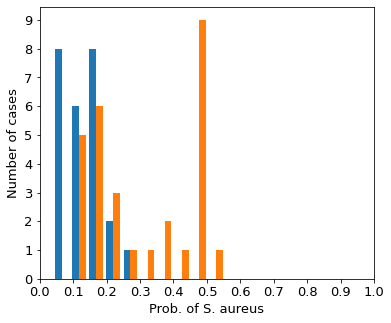

In [39]:
# Plot distribution
import pandas as pd
import numpy as np
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
x0 = df[df['y_true']==0]['y_pred']
x1 = df[df['y_true']==1]['y_pred']

fig = plt.figure(figsize=(6,5)) #
ax = fig.add_subplot(1, 1, 1)
ret = ax.hist([x0, x1], bins=10, stacked=False)
hist_max = int(np.max(ret[0]))

plt.xticks(np.arange(0, 1.1, 0.1), fontsize = 13)
plt.yticks(np.arange(0, hist_max+1, 1), fontsize = 13)

plt.xlabel('Prob. of S. aureus', fontsize = 13)
plt.ylabel('Number of cases', fontsize = 13)

#plt.ylim(0, 10)
plt.show()

AUC: 0.8234482758620689


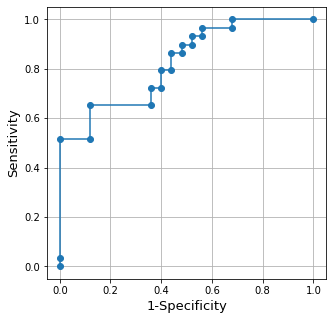

Sensitivity 65.51724137931035%, Specificity 88.0%, Threshold 18.948851062512038%


In [43]:
# ROC curve
fpr, tpr, thres = metrics.roc_curve(y_true, y_pred)
auc = metrics.auc(fpr, tpr)
print('AUC:', auc)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('1-Specificity', fontsize = 13)
plt.ylabel('Sensitivity', fontsize = 13)
plt.grid()
plt.show()

# Youden index
sgn = 1 - fpr
tpr_sgn_1 = tpr + sgn - 1
idx = np.argmax(tpr_sgn_1)
Th = thres[idx]
Se = tpr[idx]
Sp = sgn[idx]
print("Sensitivity {}%, Specificity {}%, Threshold {}%".format(Se*100, Sp*100, Th*100))